# TP2 Deep Learning DNN FCNN : 
> Ce TP est effectué par :
**Sandra Mourali** **Anas Chaibi** **Salma Ghabri** **Aziz Bellaaj**
---

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


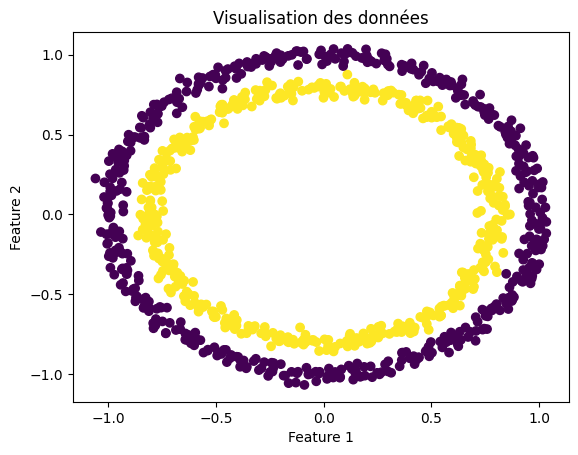

Dimensions de X_train : (800, 2)
Dimensions de X_test : (200, 2)
Dimensions de y_train : (800,)
Dimensions de y_test : (200,)


In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Créer des données avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

# Visualiser les données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données')
plt.show()

# Justification : Ce dataset nécessite une fonction non linéaire pour séparer ses classes.
# Comme les données sont générées en cercles et qu'elles sont mélangées avec un peu de bruit, une fonction non linéaire est nécessaire pour séparer les classes.

# Diviser les données en ensembles d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)


### 1.2 Définition du modèle :

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer un nouveau modèle Sequential
model = Sequential()

# Ajouter une couche entièrement connectée avec 5 neurones cachés
model.add(Dense(5, input_shape=(2,), activation='sigmoid'))

# Ajouter une couche de sortie avec un neurone
model.add(Dense(1, activation='sigmoid'))

# Afficher un résumé concis de l'architecture du modèle
model.summary()

c:\Users\HP OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

> 2. Comment choisir les dimensions de l’entr´ee et de la sortie du FCNN.
* L'entrée est le shape d'une instance ->`X[0].shape` deux features X1 et X2
* La sortie est le shape d'une instance de y (la classe) `y[0].shape`=1 la classe 0 ou 1 (classification binaire)
* Si multiclass classification la sortie doit etre = au nombre de classes

> 4. Comment choisir la valeur de l’hyperparamétre nombre de neurones par couche cachée.

* Ca dépend du complexité du Dataset et son dimension. 
* Plus le Dataset est grande plus on augumente le hyperparameter de notre modéle mais on doit faire attention au Overfitting et si c'est le cas on diminue la complexité de notre modéle.

> 5. Pourquoi la couche 2 a 5 features d’entree ?

* Car la couche 1 a 5 features de sortie sinon on va avoir une error shape car dans la méthode forward on passé les courches séquentiellement.

> 6. D´efinir la fonction de perte (entropie crois´ee binaire) et l’optimiseur (SGD - Stochastic Gradient Descent
avec un learning rate de 0.1) du FCNN

In [3]:
from tensorflow.keras.optimizers import SGD

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

> 7. PyTorch a deux impl´ementations de l’entropie crois´ee binaire. Expliquer la diff´erence entre ces deux
m´ethodes torch.nn.BCELoss() et torch.nn.BCEWithLogitsLoss().

* `torch.nn.BCEWithLogitsLoss()` ajoute la fonction Sigmoid layer (sigma) a l'entrée du class predicted ce qui rend la fonction de loss plus stable (on applique Sigmoid -> le range des valeurs predicted va etre entre 0 et 1)  
* `torch.nn.BCELoss()` calcule le loss directement et donc les valeurs vont etre plus bias

In [4]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Afficher la progression toutes les 10 époques
for i in range(0, 100, 10):
    print(f"Époque {i+1}/{100} - Loss: {history.history['loss'][i]}, Accuracy: {history.history['accuracy'][i]}, Test Loss: {history.history['val_loss'][i]}, Test Accuracy: {history.history['val_accuracy'][i]}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4491 - loss: 0.7051 - val_accuracy: 0.4200 - val_loss: 0.7042
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4163 - loss: 0.7074 - val_accuracy: 0.4450 - val_loss: 0.7022
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4655 - loss: 0.6988 - val_accuracy: 0.4500 - val_loss: 0.7007
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4416 - loss: 0.7052 - val_accuracy: 0.4600 - val_loss: 0.6996
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4765 - loss: 0.6994 - val_accuracy: 0.4600 - val_loss: 0.6988
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.6953 - val_accuracy: 0.4450 - val_loss: 0.6982
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4891 - loss: 0.7016 - val_accuracy: 0.4500 - val_loss: 0.6977
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.6988 - val_accuracy: 0.4500 - v

> 2. Que remarquez-vous sur les performances du modéle ?

Lors de 100 epochs le modéle n'a presque rien appris: train_accuracy et test_accuracy est 50% et n'auguementent plus

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


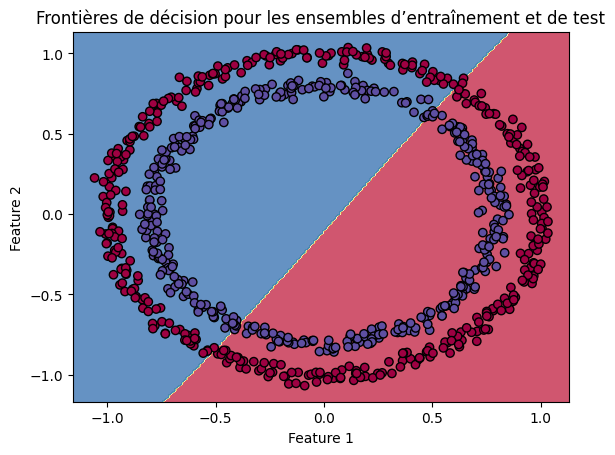

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la grille pour la visualisation
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédire les étiquettes pour chaque point dans la grille
# Prédire les probabilités pour chaque point dans la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir les probabilités en classes (0 ou 1)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


# Tracer les frontières de décision
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Tracer les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()

> Quel est le probléme de ce modéle ?

Il ne peut classifier que linéairement

> Comment am´eliorer les performances du mod`ele ? Proposer 6 techniques d’amélioration et implementer
une (ou la combinaison) des solutions proposées

* Augumenter le nombre des couches
* Augumenter le nombre des epochs (dans ce cas n'a aucun sens car il va séparer encore linéarement)
* Changer le learning rate de l'optimizer
* Changer l'optimizer ou le loss function
* Augumenter le nombre des hidden units
* Ajouter des layers non linéaires : activation layer -> c'est clair que le modéle nécessite cette solution donc on va l'implementer par l'ajout de la fonction simple Relu  ajouter une autre couche et augumenter le nombre des epochs

Epochs **1000**

In [6]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1)

# Afficher la progression toutes les 10 époques
for i in range(0, 100, 10):
    print(f"Époque {i+1}/{100} - Loss: {history.history['loss'][i]}, Accuracy: {history.history['accuracy'][i]}, Test Loss: {history.history['val_loss'][i]}, Test Accuracy: {history.history['val_accuracy'][i]}")

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4860 - loss: 0.6961 - val_accuracy: 0.5300 - val_loss: 0.6953
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 0.6939 - val_accuracy: 0.5350 - val_loss: 0.6953
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.6955 - val_accuracy: 0.5350 - val_loss: 0.6953
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5234 - loss: 0.6920 - val_accuracy: 0.5350 - val_loss: 0.6953
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5164 - loss: 0.6919 - val_accuracy: 0.5300 - val_loss: 0.6953
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5024 - loss: 0.6947 - val_accuracy: 0.5300 - val_loss: 0.6953
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4836 - loss: 0.6963 - val_accuracy: 0.5300 - val_loss: 0.6953
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 0.6946 - val_accuracy: 0.

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step


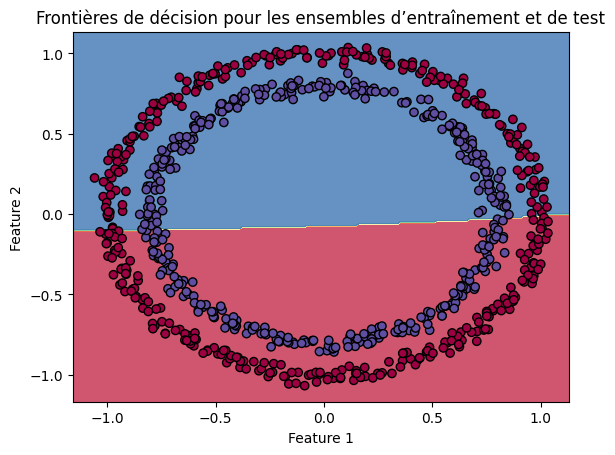

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la grille pour la visualisation
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédire les étiquettes pour chaque point dans la grille
# Prédire les probabilités pour chaque point dans la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir les probabilités en classes (0 ou 1)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


# Tracer les frontières de décision
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Tracer les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()

### Ajouter des couches et des neurones

In [8]:
# Créer un nouveau modèle Sequential
model = Sequential()

# Ajouter plusieurs couches cachées
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Ajouter une couche de sortie avec un neurone
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5099 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4798 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6778 - val_accuracy: 0.5200 - val_loss: 0.6819
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5227 - loss: 0.6722 - val_accuracy: 0.5000 - val_loss: 0.6708
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5891 - loss: 0.6666 - val_accuracy: 0.5750 - val_loss: 0.6552
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 0.6397 - val_accuracy: 0.6050 - val_loss: 0.6220
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.5891 - val_accuracy: 0.8000 - val_loss: 0.5483
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9180 - loss: 0.5071 - val_accuracy: 0.9300 - v

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


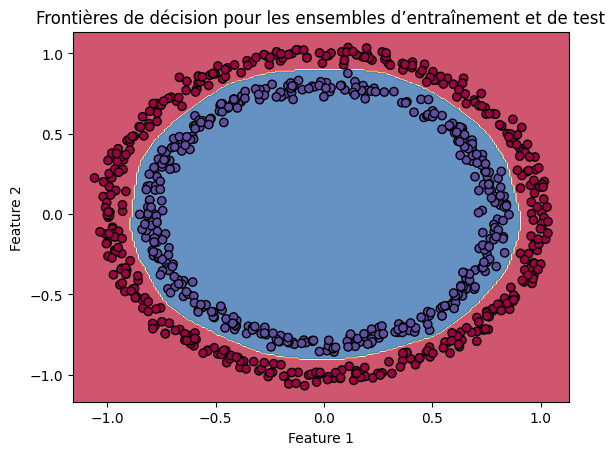

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la grille pour la visualisation
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédire les étiquettes pour chaque point dans la grille
# Prédire les probabilités pour chaque point dans la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir les probabilités en classes (0 ou 1)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


# Tracer les frontières de décision
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Tracer les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()

# 2. Classification multi-classes avec des réseaux de neurones entièrement connectés

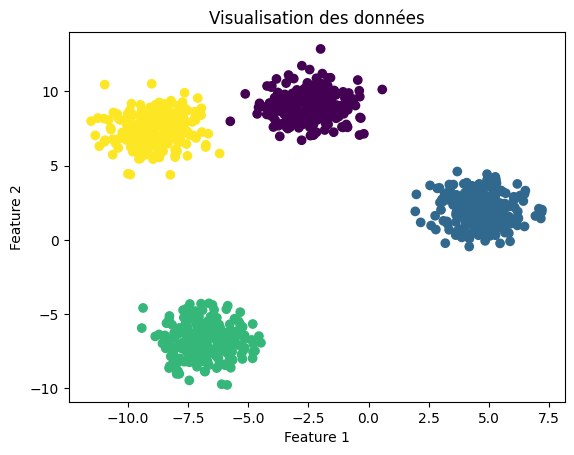

In [18]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données')
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Ajouter des couches cachées
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, donc softmax pour la classification multiclasse

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Afficher la progression toutes les 10 époques
for i in range(0, 100, 10):
    print(f"Époque {i+1}/{100} - Loss: {history.history['loss'][i]}, Accuracy: {history.history['accuracy'][i]}, Test Loss: {history.history['val_loss'][i]}, Test Accuracy: {history.history['val_accuracy'][i]}")


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9988 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 3.4112e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 1.7312e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 3.8329e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.0429e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.3387e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 4.9399e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 6.7064e-04 - val_accuracy: 1.0000 - val_loss: 3.2571e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0

1606/1606 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step


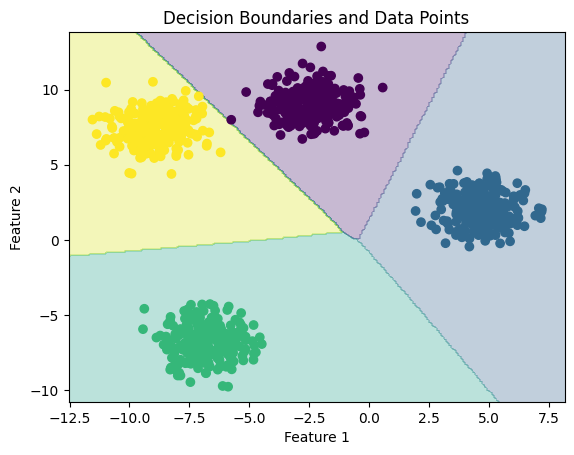

In [32]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the mesh grid
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=-1)
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries and Data Points')
plt.show()

In [33]:
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=-1)

1606/1606 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
